In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB ##Naive-bayes classifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score

In [3]:
df = pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
## Converting text-target to numerical-target 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df = df.drop_duplicates(keep="first")

In [14]:
df.shape

(5169, 2)

# Data analysis

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

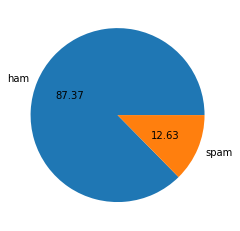

In [17]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geeth_glh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.923776,18.456375,1.962275
std,0.332253,58.174846,13.323322,1.433892
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [26]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [28]:
df[df['target'] == 0]['num_characters']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 4516, dtype: int64

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

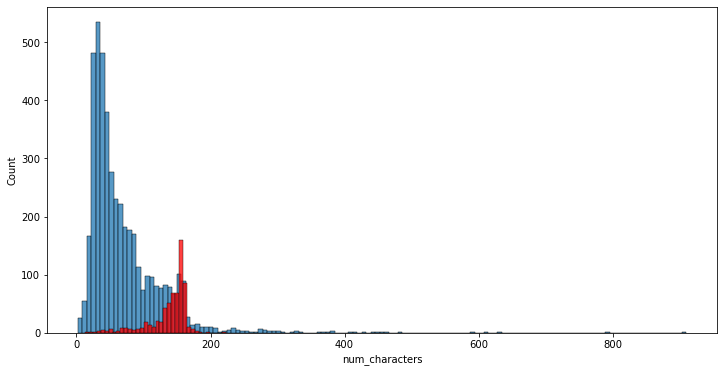

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

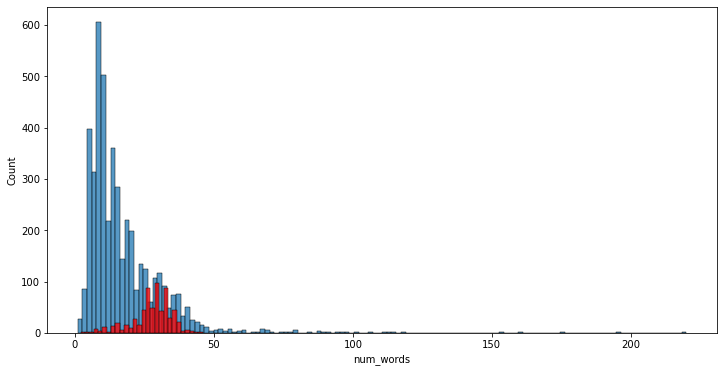

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

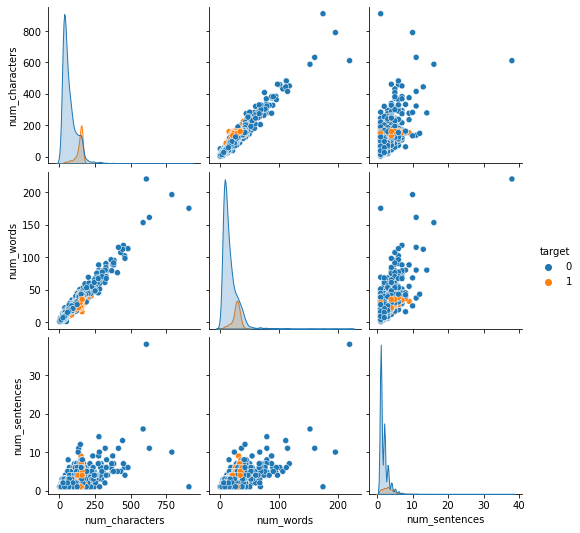

In [31]:
## To find the correlation among the different columns in the dataset

sns.pairplot(df,hue='target')

In [32]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.382785,0.263143,0.269132
num_characters,0.382785,1.000000,0.966087,0.626197
num_words,0.263143,0.966087,1.000000,0.680924
num_sentences,0.269132,0.626197,0.680924,1.000000


<AxesSubplot:>

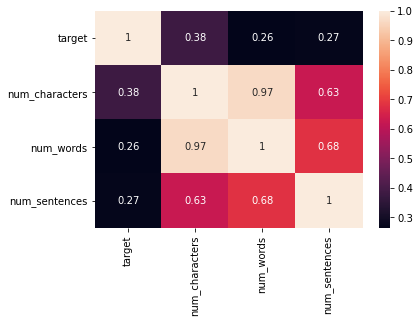

In [33]:
sns.heatmap(df.corr(), annot=True)

# Data preprocessing

In [34]:
## Converting to lower case

def transform_text(text):
    text = text.lower()
    return text

In [35]:
transform_text("I am Going Home")

'i am going home'

In [36]:
## Converting to words

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text

In [37]:
transform_text("I am Going Home")

['i', 'am', 'going', 'home']

In [38]:
## Deleting all the alpha-numeric words

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():  ##alpha-numeric
            y.append(i)
    return y

In [39]:
transform_text("I am Going Home!%")

['i', 'am', 'going', 'home']

In [40]:
transform_text("I am Going Home at 2:00!!")

['i', 'am', 'going', 'home', 'at']

In [41]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
## removing stopwords and punctuations

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return y

In [44]:
transform_text("I am Going Home at 2:00..")

['going', 'home']

In [45]:
transform_text("Did you had lunch??")

['lunch']

In [46]:
## stemming

ps = PorterStemmer()
ps.stem('loving')

'love'

In [47]:
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [48]:
## Complete text_transforming

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [49]:
transform_text("Hi!!!! How are you doing Anjali")

'hi anjali'

In [50]:
df["text"][9]

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [51]:
transform_text(df["text"][9])

'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030'

In [52]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

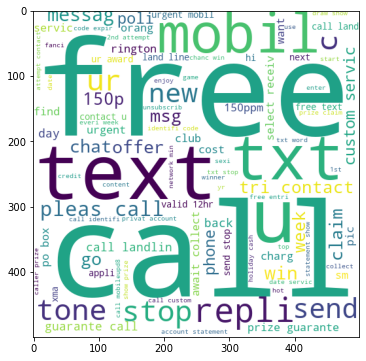

In [54]:
## for spam 

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

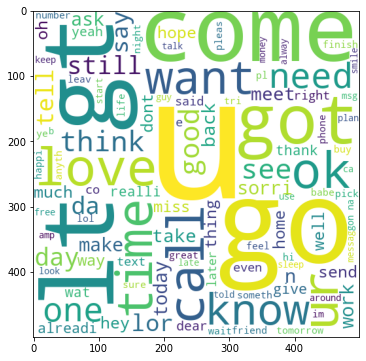

In [55]:
##For ham

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [56]:
df[df['target'] == 1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [57]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
len(spam_corpus)

9941

In [59]:
pd.DataFrame(counter(spam_corpus).most_common(30))

NameError: name 'counter' is not defined

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

35303

C:\Users\geeth_glh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


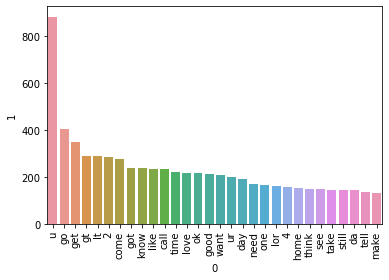

In [62]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [64]:
## Vectorizing words using bag of words

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [65]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [66]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [67]:
X.shape

(5169, 3000)

In [68]:
Y = df["target"].values

In [69]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
Y.shape

(5169,)

In [71]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
## For Gaussian naive bayes model

gnb.fit(X_train,Y_train)

Y_pred_gnb = gnb.predict(X_test)

print("Accuracy score for Gaussian naive bayes model:",accuracy_score(Y_test,Y_pred_gnb))
print("Confusion matrix for Gaussian naive bayes model:")
print(confusion_matrix(Y_test,Y_pred_gnb))
print("Precision score for Gaussian naive bayes model:",precision_score(Y_test,Y_pred_gnb))
print("Recall score for Gaussian naive bayes model:",recall_score(Y_test,Y_pred_gnb))


Accuracy score for Gaussian naive bayes model: 0.8704061895551257
Confusion matrix for Gaussian naive bayes model:
[[788 108]
 [ 26 112]]
Precision score for Gaussian naive bayes model: 0.509090909090909
Recall score for Gaussian naive bayes model: 0.8115942028985508


In [74]:
## for multinomial naive bayes

mnb.fit(X_train,Y_train)
Y_pred_mnb = mnb.predict(X_test)
print("Accuracy score for Multinomial naive bayes model:",accuracy_score(Y_test,Y_pred_mnb))
print("Confusion matrix for Multinomial naive bayes model:")
print(confusion_matrix(Y_test,Y_pred_mnb))
print("Precision score for multinomial naive bayes model:",precision_score(Y_test,Y_pred_mnb))
print("Recall score for Gaussian naive bayes model:",recall_score(Y_test,Y_pred_gnb))


Accuracy score for Multinomial naive bayes model: 0.971953578336557
Confusion matrix for Multinomial naive bayes model:
[[896   0]
 [ 29 109]]
Precision score for multinomial naive bayes model: 1.0
Recall score for Gaussian naive bayes model: 0.8115942028985508


In [75]:
## for Bernoulli naive bayes

bnb.fit(X_train,Y_train)
Y_pred_bnb = bnb.predict(X_test)
print("Accuracy score for Bernoulli naive bayes model:",accuracy_score(Y_test,Y_pred_mnb))
print("Confusion matrix for Bernoulli naive bayes model:")
print(confusion_matrix(Y_test,Y_pred_mnb))
print("Precision score for Bernoulli naive bayes model:",precision_score(Y_test,Y_pred_mnb))
print("Recall score for Gaussian naive bayes model:",recall_score(Y_test,Y_pred_gnb))


Accuracy score for Bernoulli naive bayes model: 0.971953578336557
Confusion matrix for Bernoulli naive bayes model:
[[896   0]
 [ 29 109]]
Precision score for Bernoulli naive bayes model: 1.0
Recall score for Gaussian naive bayes model: 0.8115942028985508


# Comparing MNB with other algorithms

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [77]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [78]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [81]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    
    return accuracy,precision,recall

In [82]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9748549323017408, 0.9745762711864406, 0.8333333333333334)

In [83]:
train_classifier(knc,X_train,Y_train,X_test,Y_test)

(0.9052224371373307, 1.0, 0.2898550724637681)

In [84]:
accuracy_scores = []
precision_scores = []
recall_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("recall - ",current_recall)

    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)


For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
recall -  0.8333333333333334
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
recall -  0.2898550724637681
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
recall -  0.7898550724637681
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8252427184466019
recall -  0.6159420289855072
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
recall -  0.6956521739130435
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
recall -  0.8333333333333334
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
recall -  0.7536231884057971
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
recall -  0.8188405797101449
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
recall -  0.8695652173913043
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9278350515463918
recall -  0.6521739130434783
For  xgb
Accuracy -  

In [87]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,"Recall":recall_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,Recall
1,KN,0.905222,1.000000,0.289855
2,NB,0.971954,1.000000,0.789855
5,RF,0.975822,0.982906,0.833333
8,ETC,0.979691,0.975610,0.869565
0,SVC,0.974855,0.974576,0.833333
4,LR,0.956480,0.969697,0.695652
6,AdaBoost,0.961315,0.945455,0.753623
10,xgb,0.968085,0.933884,0.818841
9,GBDT,0.946809,0.927835,0.652174
7,BgC,0.959381,0.869231,0.818841


In [88]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.971954
2,RF,Accuracy,0.975822
3,ETC,Accuracy,0.979691
4,SVC,Accuracy,0.974855
5,LR,Accuracy,0.956480
6,AdaBoost,Accuracy,0.961315
7,xgb,Accuracy,0.968085
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.959381


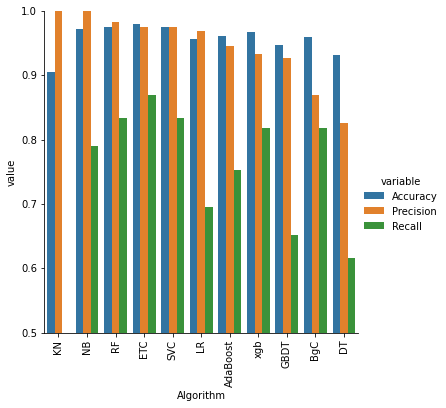

In [89]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [90]:
## comparing top 3 classifiers
## voting_classifier(It is the combination of multiple classifiers with equal weightage)
## Here the results might be better than individual classifiers

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [91]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [93]:
## VOting_classifier predictions
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))
print("Recall",recall_score(Y_test,y_pred))


Accuracy 0.9825918762088974
Precision 0.9918032786885246
Recall 0.8768115942028986


In [94]:
# Applying stacking

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]

final_estimator=RandomForestClassifier()

from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [95]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))
print("Recall",recall_score(Y_test,y_pred))


Accuracy 0.9787234042553191
Precision 0.9461538461538461
Recall 0.8913043478260869


In [96]:
##modeling pipeline for the use of website

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))  


## wb-->write binary